# Gershgorin's Theorem

## 0. Initialize

In [1]:
using LinearAlgebra
using Plots
pyplot()

Plots.PyPlotBackend()

## 1. Gershgorin Plots

In [2]:
function get_complex_circle(c, r)
    #c: center, r: radius
    return [c + r*exp(y*im*π) for y in -1:0.01:1]
end

function get_disk(A, k, n)
    a_k = A[k, :]
    c = 0+0*im; r = 0
    for j in 1:n
        if j==k
            c = a_k[j]
        else
            r += abs(a_k[j])
        end
    end     
    return c, r
end

function get_disks(A)
    n = size(A, 1)
    disks = []
    for k in 1:n
        c, r = get_disk(A, k, n)
        disk = get_complex_circle(c, r)
        push!(disks, disk)
    end
    return disks
end

function gershgorin_plot(A)
    #disk and eigenvalues
    disks = get_disks(A)
    Λ = Complex.(eigen(A).values)
    
    fig = plot(aspect_ratio=1)
    for disk in disks
        plot!(disk, label=false, color=:red)
    end
    plot!(Λ, st=:scatter, color=:black, label="eigenvalues")
    return fig
end

gershgorin_plot (generic function with 1 method)

## 2. Some examples

### 2-1. Example1: a first example

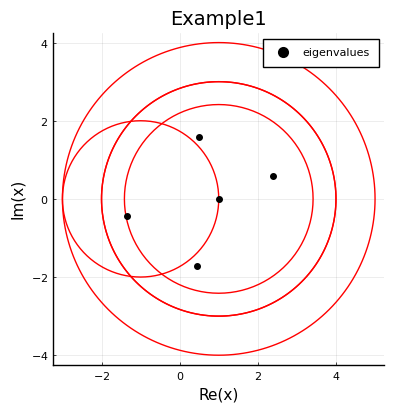

"/Users/kitanotomoya/Documents/julia/ML/ブログ/Gershgorin's-Theorem/fig1.png"

In [3]:
A = [1 0 1+im 1 0; -1 -1 0 -1 0; 2 1 1 -1 0; 0 2 1 1 0 ; 2 0 1 0 1]
fig1 = gershgorin_plot(A)
plot!(title="Example1")
savefig(fig1, "Gershgorin's-Theorem/fig1.png")

### 2-2. Example2: Upper triangularization

Λ = inv(P) * A * P = [-1.0 1.0 0.0; 0.0 1.0 1.0; 0.0 0.0 2.0]


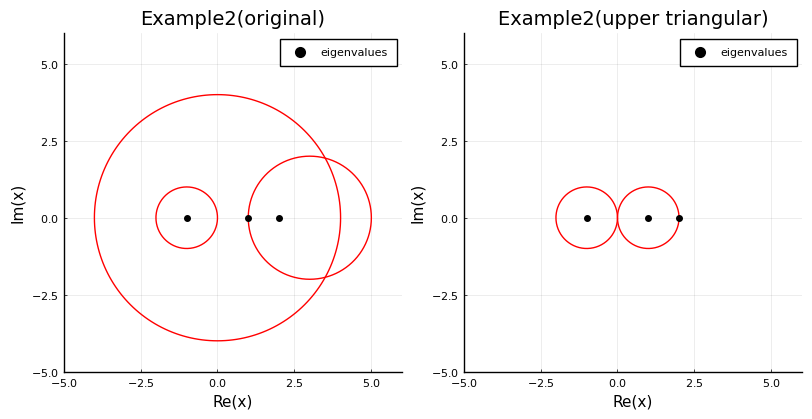

"/Users/kitanotomoya/Documents/julia/ML/ブログ/Gershgorin's-Theorem/fig2.png"

In [4]:
#original
A = [-1. 1 0; 1 3 1; 1 -3 0]
fig2_1 = gershgorin_plot(A)
plot!(xlim=(-5,6), ylim=(-5,6), title="Example2(original)")

#upper triangular matrix
P = [1 0 0; 0 1 0; -1 -2 1]
@show Λ = inv(P) * A * P
fig2_2 = gershgorin_plot(Λ)
plot!(xlim=(-5,6), ylim=(-5,6), title="Example2(upper triangular)")

fig2 = plot(fig2_1, fig2_2, size=(800, 600))
savefig(fig2, "Gershgorin's-Theorem/fig2.png")

### 2-3. Example3: Diagonally dominant matrix

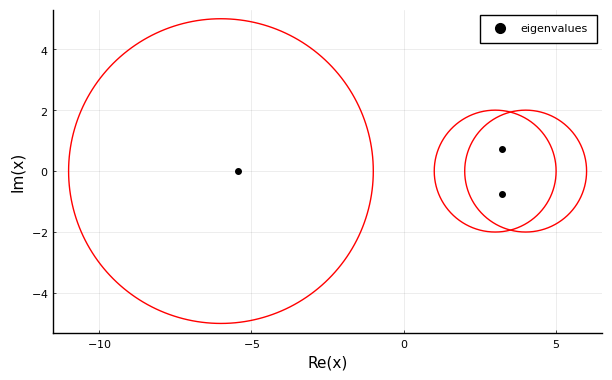

"/Users/kitanotomoya/Documents/julia/ML/ブログ/Gershgorin's-Theorem/fig3.png"

In [5]:
A = [4 -1 1; 2 -6 3; -1 -1 3]
fig3 = gershgorin_plot(A)
savefig(fig3, "Gershgorin's-Theorem/fig3.png")